# Problem Statement:-

Storm Motors is an e-commerce company who act as a mediators between parties interested in selling and buying pre-owned cars.

Storm motors wishes to develop an algorithm to predict the price of the cars based on various attributes associated with the car.

# Predicting price of pre-owned cars

# importing packages

In [689]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# setting dimensions for plot

In [690]:
sns.set(rc={'figure.figsize':(11.7, 8.27)})

# reading csv file

In [691]:
cars_data = pd.read_csv('E:/Python for data science NPTEL/cars_sampled.csv')
cars_data

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,30/03/2016 13:51,Zu_verkaufen,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN,30/03/2016 0:00,20257,7/4/2016 4:44
1,7/3/2016 9:54,Volvo_XC90_2.4D_Summum,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,7/3/2016 0:00,88045,26/03/2016 13:17
2,1/4/2016 0:57,Volkswagen_Touran,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN,31/03/2016 0:00,27449,1/4/2016 8:40
3,19/03/2016 17:50,Seat_Ibiza_1.4_16V_Reference,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,19/03/2016 0:00,34537,7/4/2016 4:44
4,16/03/2016 14:51,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no,16/03/2016 0:00,55270,1/4/2016 23:18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49996,3/4/2016 15:48,Suche_VW_T5_Multivan,private,request,0,test,bus,2005,NaN,0,transporter,150000,0,NaN,volkswagen,NaN,3/4/2016 0:00,29690,5/4/2016 15:16
49997,27/03/2016 14:55,Suche_einen_originalen_VW_Golf_2_Fire_and_Ice_G60,private,request,19999,control,NaN,1990,NaN,0,golf,5000,0,NaN,volkswagen,NaN,27/03/2016 0:00,50181,7/4/2016 11:45
49998,14/03/2016 18:51,[SUCHE]_BMW_e46_Coupe_330ci_M_Paket_Facelift__...,private,request,0,test,coupe,2004,manual,0,3er,150000,1,petrol,bmw,no,14/03/2016 0:00,86956,25/03/2016 6:17
49999,15/03/2016 18:06,Verkaufe_mehrere_Fahrzeuge_zum_Verschrotten,commercial,offer,100,control,station wagon,2000,manual,0,megane,150000,8,petrol,renault,NaN,15/03/2016 0:00,65232,6/4/2016 17:15


# creating copy

In [692]:
cars = cars_data.copy()

# structure of data

In [693]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50001 non-null  object
 1   name                 50001 non-null  object
 2   seller               50001 non-null  object
 3   offerType            50001 non-null  object
 4   price                50001 non-null  int64 
 5   abtest               50001 non-null  object
 6   vehicleType          44813 non-null  object
 7   yearOfRegistration   50001 non-null  int64 
 8   gearbox              47177 non-null  object
 9   powerPS              50001 non-null  int64 
 10  model                47243 non-null  object
 11  kilometer            50001 non-null  int64 
 12  monthOfRegistration  50001 non-null  int64 
 13  fuelType             45498 non-null  object
 14  brand                50001 non-null  object
 15  notRepairedDamage    40285 non-null  object
 16  date

# summarizing data

In [694]:
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,50001.000,50001.000,50001.000,50001.000,50001.000,50001.000
mean,6559.865,2005.544,116.496,125613.688,5.744,50775.217
std,85818.470,122.992,230.568,40205.234,3.711,25743.702
min,0.000,1000.000,0.000,5000.000,0.000,1067.000
25%,1150.000,1999.000,69.000,125000.000,3.000,30559.000
50%,2950.000,2003.000,105.000,150000.000,6.000,49504.000
75%,7190.000,2008.000,150.000,150000.000,9.000,71404.000
max,12345678.000,9999.000,19312.000,150000.000,12.000,99998.000


In [695]:
pd.set_option('display.float_format', lambda x: '%.3f' %x)
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,50001.000,50001.000,50001.000,50001.000,50001.000,50001.000
mean,6559.865,2005.544,116.496,125613.688,5.744,50775.217
std,85818.470,122.992,230.568,40205.234,3.711,25743.702
min,0.000,1000.000,0.000,5000.000,0.000,1067.000
25%,1150.000,1999.000,69.000,125000.000,3.000,30559.000
50%,2950.000,2003.000,105.000,150000.000,6.000,49504.000
75%,7190.000,2008.000,150.000,150000.000,9.000,71404.000
max,12345678.000,9999.000,19312.000,150000.000,12.000,99998.000


# to display maximum set of columns

In [696]:
pd.set_option('display.max_columns', 500)
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,50001.000,50001.000,50001.000,50001.000,50001.000,50001.000
mean,6559.865,2005.544,116.496,125613.688,5.744,50775.217
std,85818.470,122.992,230.568,40205.234,3.711,25743.702
min,0.000,1000.000,0.000,5000.000,0.000,1067.000
25%,1150.000,1999.000,69.000,125000.000,3.000,30559.000
50%,2950.000,2003.000,105.000,150000.000,6.000,49504.000
75%,7190.000,2008.000,150.000,150000.000,9.000,71404.000
max,12345678.000,9999.000,19312.000,150000.000,12.000,99998.000


# dropping unwanted columns

In [697]:
col = ['name','dateCrawled','dateCreated','postalCode','lastSeen']
cars = cars.drop(columns = col, axis = 1)

# removing duplicate records

In [698]:
cars.drop_duplicates(keep = 'first', inplace = True)

# Data cleaning

# finding number of missing values in each column

In [699]:
cars.isnull().sum()

seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5152
yearOfRegistration        0
gearbox                2765
powerPS                   0
model                  2730
kilometer                 0
monthOfRegistration       0
fuelType               4467
brand                     0
notRepairedDamage      9640
dtype: int64

# variable yearOfRegistration

In [700]:
yearwise_count= cars['yearOfRegistration'].value_counts().sort_index()
yearwise_count

1000     6
1255     1
1500     2
1910    14
1928     1
        ..
7500     1
7800     1
8500     1
8888     2
9999     7
Name: yearOfRegistration, Length: 97, dtype: int64

In [701]:
sum(cars['yearOfRegistration']>2019)

24

In [702]:
sum(cars['yearOfRegistration']<1950)

38

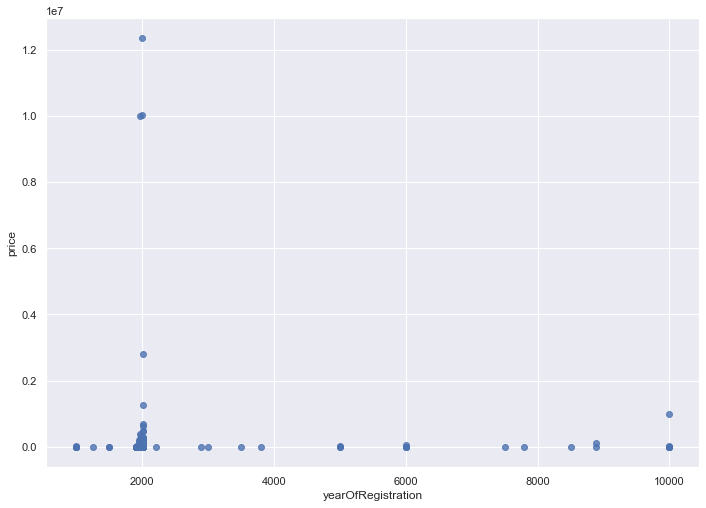

In [703]:
sns.regplot(x='yearOfRegistration', y='price', scatter=True, fit_reg=False, data=cars)

working range - 1950 and 2019

# variable price

In [704]:
price_count = cars['price'].value_counts().sort_index()
price_count

0           1415
1            172
2              1
3              1
5              4
            ... 
1250000        1
2795000        1
9999999        1
10010011       1
12345678       1
Name: price, Length: 2393, dtype: int64

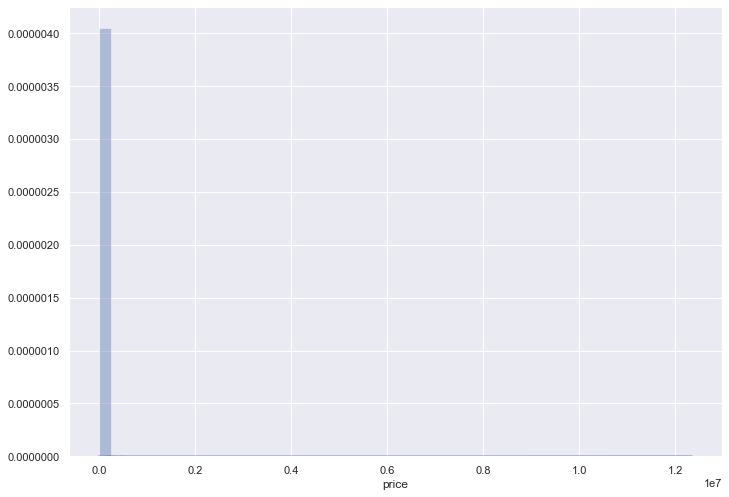

In [705]:
sns.distplot(cars['price'])

In [706]:
cars['price'].describe()

count      49531.000
mean        6567.220
std        86222.378
min            0.000
25%         1150.000
50%         2950.000
75%         7100.000
max     12345678.000
Name: price, dtype: float64

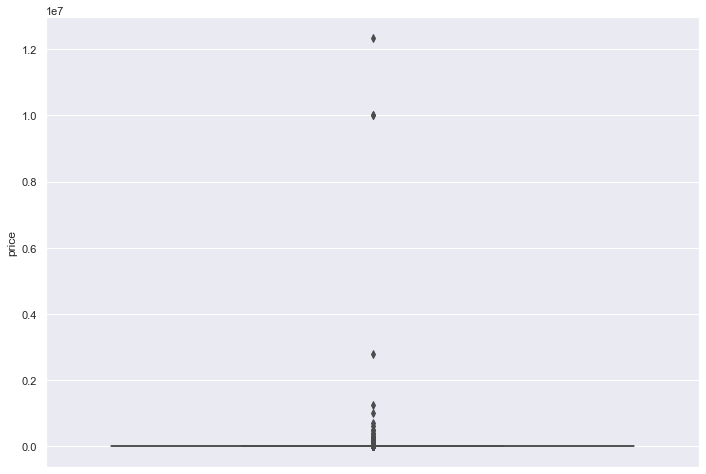

In [707]:
sns.boxplot(y = cars['price'])

In [708]:
sum(cars['price']>150000)

34

In [709]:
sum(cars['price']<100)

1748

working range - 100 and 150000

# variable powerPS

In [710]:
power_count = cars['powerPS'].value_counts().sort_index()
power_count

0        5533
1           3
2           2
3           2
4           4
         ... 
15033       1
16011       1
16312       1
19211       1
19312       1
Name: powerPS, Length: 460, dtype: int64

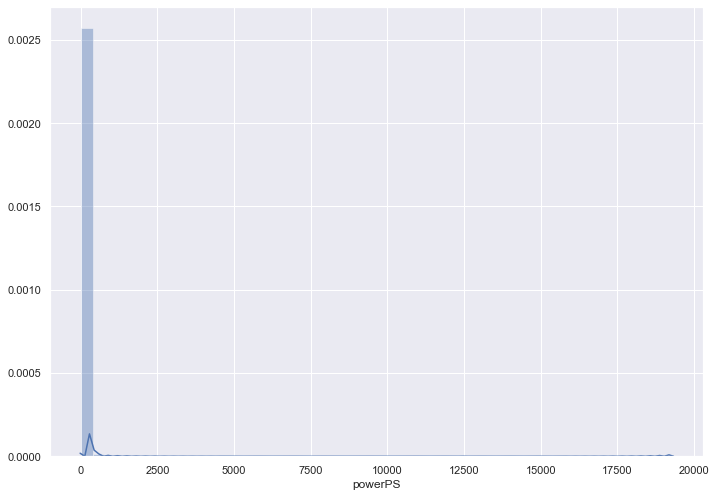

In [711]:
sns.distplot(cars['powerPS'])

In [712]:
cars['powerPS'].describe()

count   49531.000
mean      116.501
std       231.536
min         0.000
25%        69.000
50%       105.000
75%       150.000
max     19312.000
Name: powerPS, dtype: float64

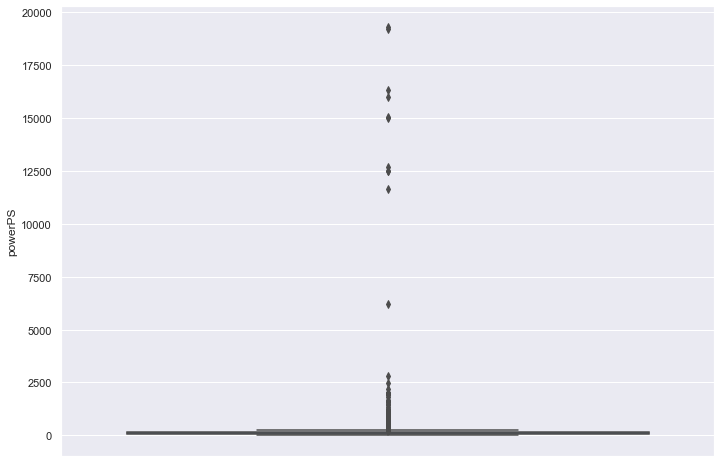

In [713]:
sns.boxplot(y = cars['powerPS'])

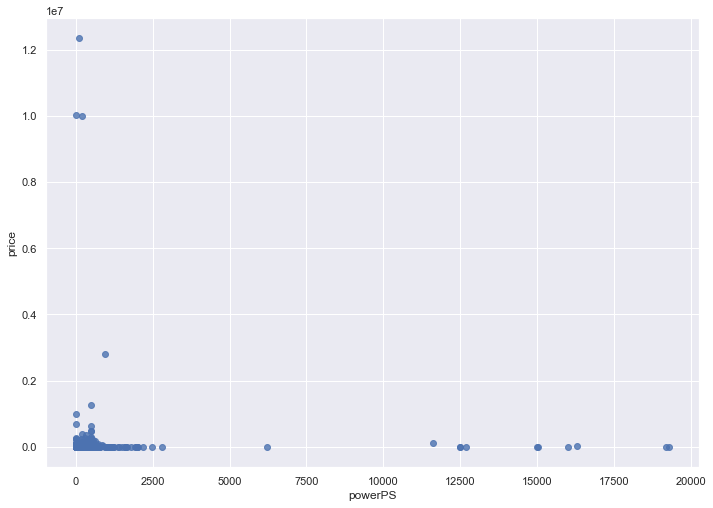

In [714]:
sns.regplot(x='powerPS', y='price', scatter=True, fit_reg=False, data=cars)

In [715]:
sum(cars['powerPS']>500)

115

In [716]:
sum(cars['powerPS']<10)

5565

working range - 10 and 500

# Working Range of Data

In [717]:
cars = cars[(cars.yearOfRegistration<=2019)&(cars.yearOfRegistration>=1950)&(cars.price<=150000)&(cars.price>=100)&(cars.powerPS<=500)&(cars.powerPS>=10)]

# further to simplify- variable reduction

# combining yearOfRegistration and monthOfRegistration

In [718]:
cars['monthOfRegistration']/=12

# creating new variable Age by adding yearOfRegistration and monthOfRegistration

In [719]:
cars['Age'] = (2019 - cars['yearOfRegistration']) + cars['monthOfRegistration']

In [720]:
cars['Age'] = round(cars['Age'],2)

In [721]:
cars['Age'].describe()

count   42772.000
mean       15.873
std         7.093
min         1.000
25%        11.330
50%        15.830
75%        20.170
max        68.750
Name: Age, dtype: float64

# dropping yearOfRegistration and monthOfRegistration

In [722]:
cars = cars.drop(columns = ['yearOfRegistration','monthOfRegistration'],axis = 1)

# Visualizing parameters

# age

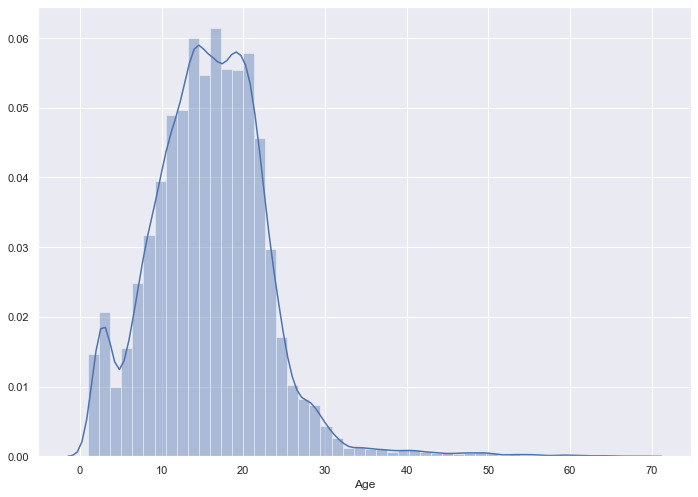

In [723]:
sns.distplot(cars['Age'])

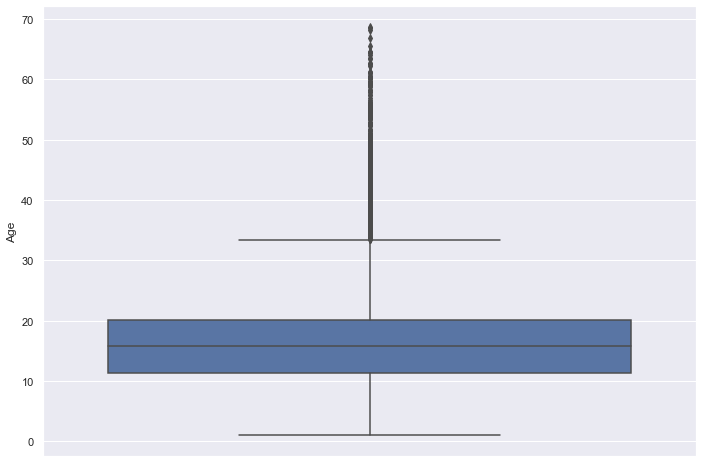

In [724]:
sns.boxplot(y = cars['Age'])

# price

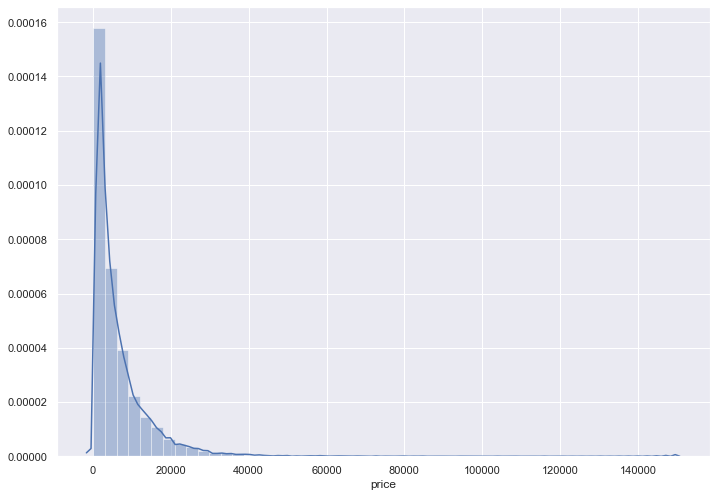

In [725]:
sns.distplot(cars['price'])

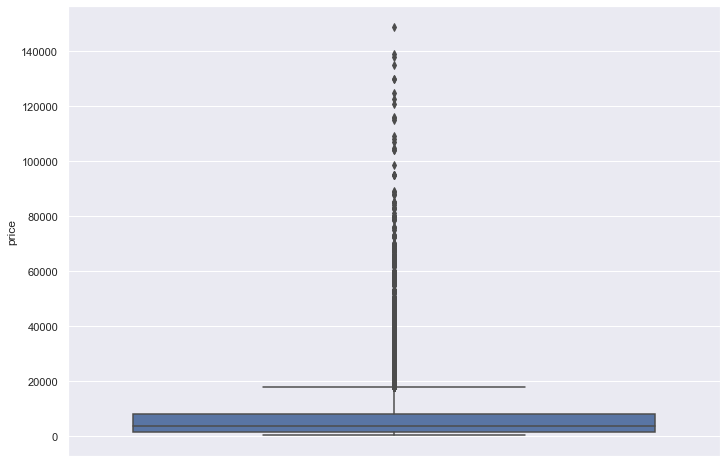

In [726]:
sns.boxplot(y = cars['price'])

# powerPS

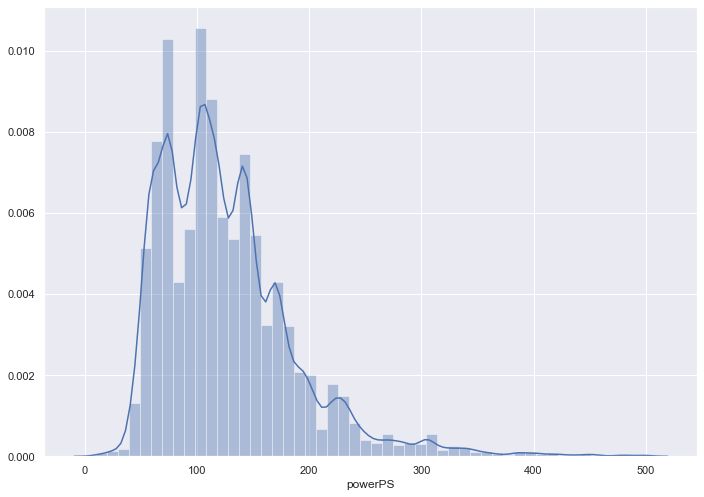

In [727]:
sns.distplot(cars['powerPS'])

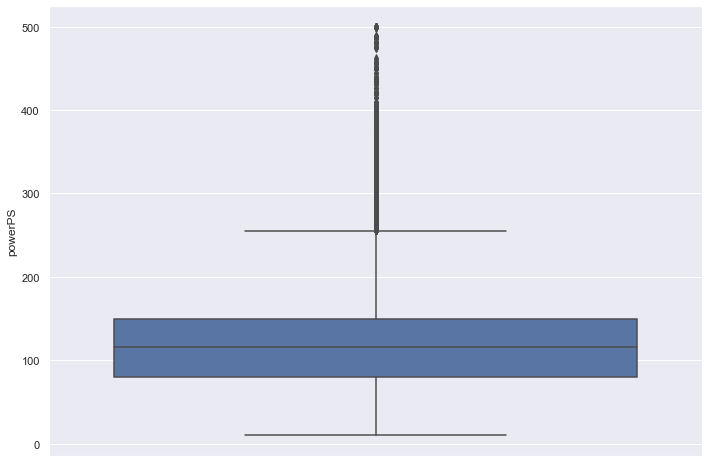

In [728]:
sns.boxplot(y = cars['powerPS'])

# Visualizing parameter after reducing working range

# age vs price

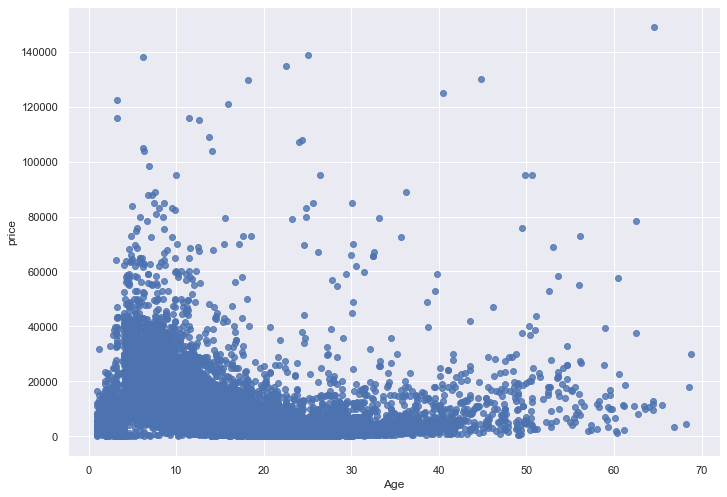

In [729]:
sns.regplot(x='Age', y='price', scatter=True, fit_reg=False, data=cars)

#cars priced higher are newer.
#with increase in age, price decreases
#however some cars are priced higher with increase in age

# powerPS vs price

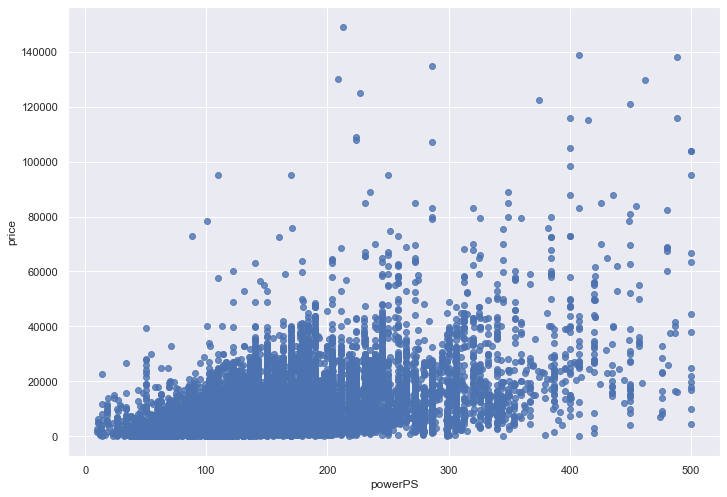

In [730]:
sns.regplot(x='powerPS', y='price', scatter=True, fit_reg=False, data=cars)

# Variable seller

In [731]:
cars['seller'].value_counts()

private       42771
commercial        1
Name: seller, dtype: int64

In [732]:
pd.crosstab(cars['seller'],columns = 'count',normalize=True)

col_0,count
seller,
commercial,0.000
private,1.000


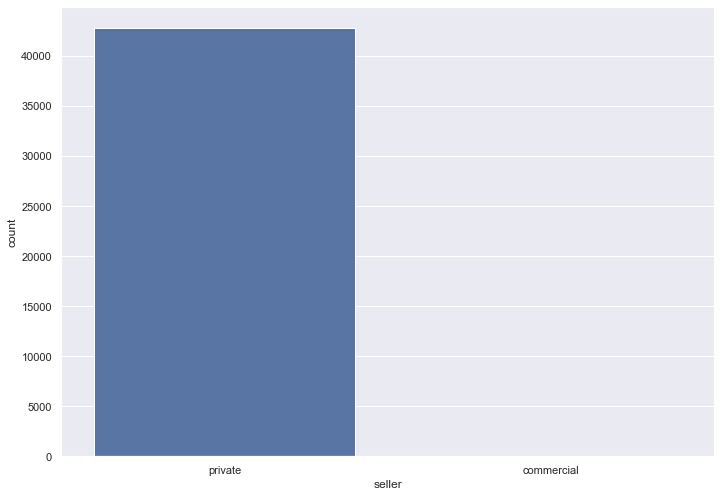

In [733]:
sns.countplot(x = 'seller',data=cars)

Fewer cars have 'commercial' => Insignificant

# Variable offerType

In [734]:
cars['offerType'].value_counts()

offer    42772
Name: offerType, dtype: int64

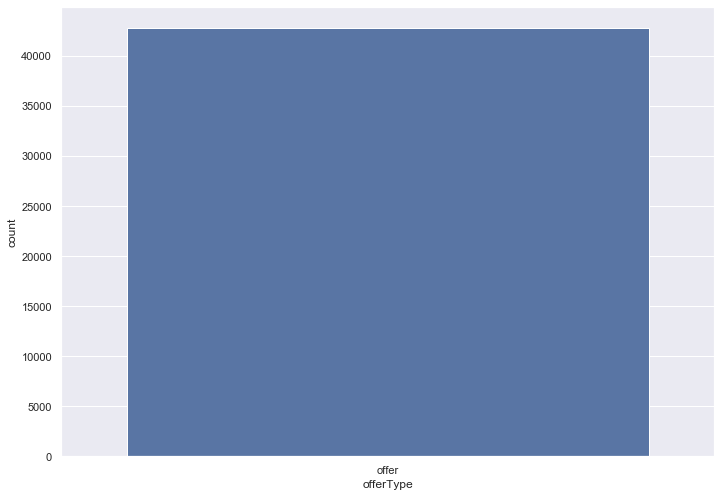

In [735]:
sns.countplot(x = 'offerType',data=cars)

All cars have 'offer' => Insignificant

# Variable abtest

In [736]:
cars['abtest'].value_counts()

test       22128
control    20644
Name: abtest, dtype: int64

In [737]:
pd.crosstab(cars['abtest'],columns = 'count',normalize=True)

col_0,count
abtest,
control,0.483
test,0.517


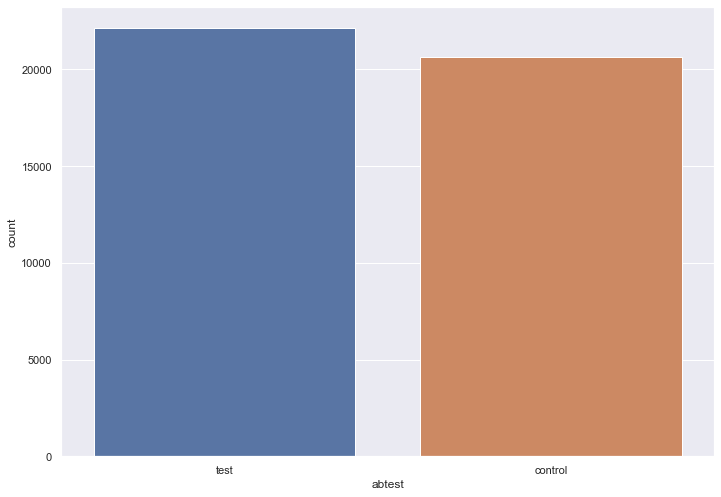

In [738]:
sns.countplot(x = 'abtest',data=cars)

Equally distributed

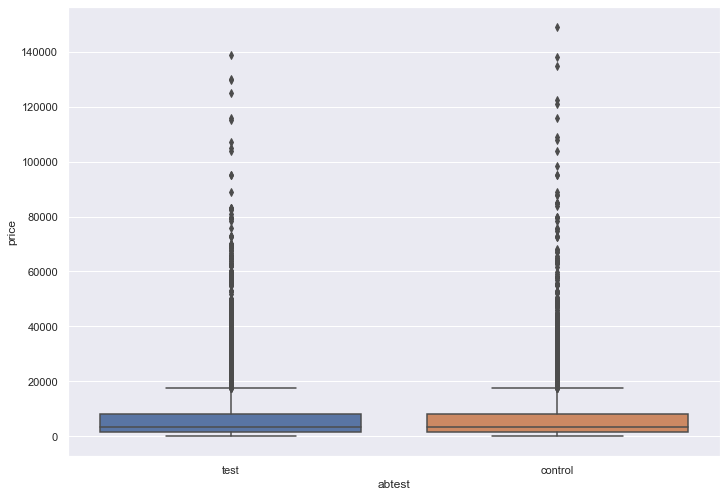

In [739]:
sns.boxplot(x='abtest',y='price',data=cars)

For every price value there is almost 50-50 distribution

Does not affect 'price' => Insignificant

# Variable vehicleType

In [740]:
cars['vehicleType'].value_counts()

limousine        11746
small car         9285
station wagon     8076
bus               3597
cabrio            2792
coupe             2261
suv               1813
others             326
Name: vehicleType, dtype: int64

In [741]:
pd.crosstab(cars['vehicleType'],columns = 'count',normalize=True)

col_0,count
vehicleType,
bus,0.090
cabrio,0.070
coupe,0.057
limousine,0.294
others,0.008
small car,0.233
station wagon,0.202
suv,0.045


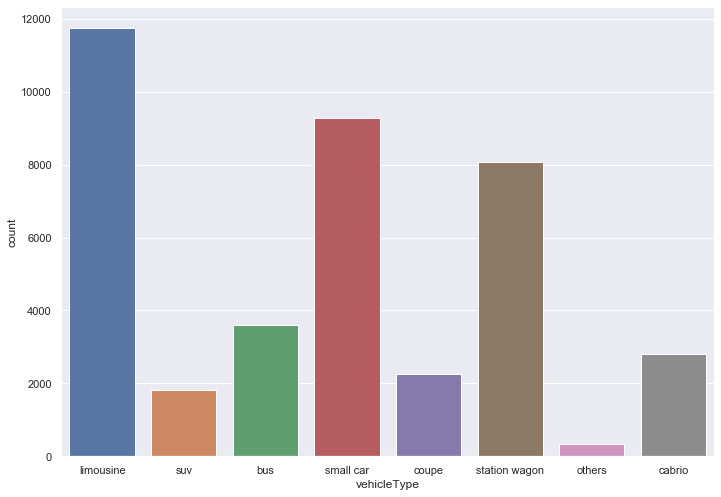

In [742]:
sns.countplot(x = 'vehicleType',data=cars)

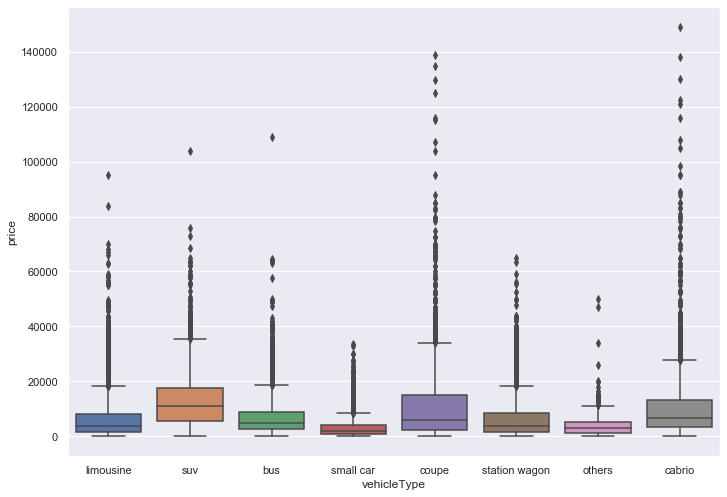

In [743]:
sns.boxplot(x='vehicleType',y='price',data=cars)

8 types - limousine, small cars and station wagons max freq

vehicleType affects price

# Variable gearbox

In [744]:
cars['gearbox'].value_counts()

manual       32582
automatic     9396
Name: gearbox, dtype: int64

In [745]:
pd.crosstab(cars['gearbox'],columns = 'count',normalize=True)

col_0,count
gearbox,
automatic,0.224
manual,0.776


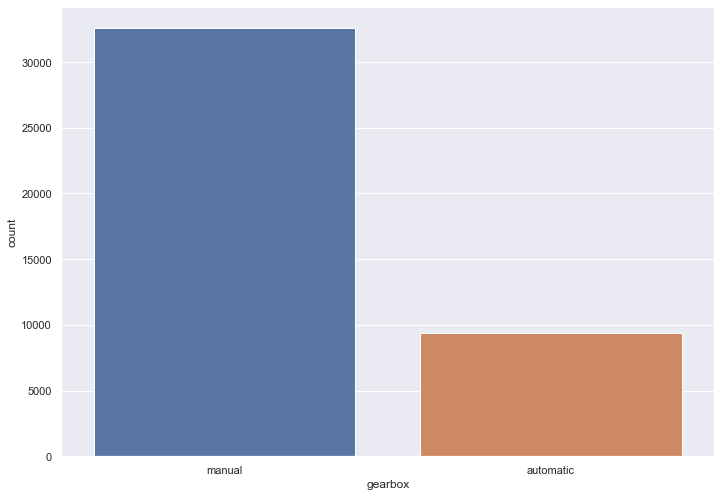

In [746]:
sns.countplot(x = 'gearbox',data=cars)

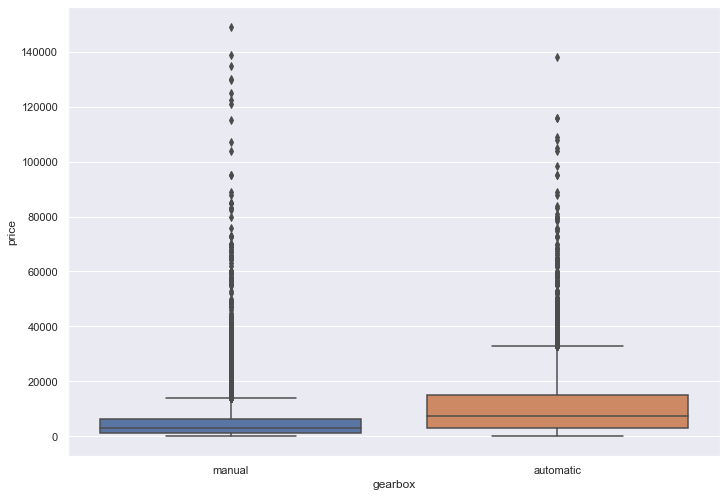

In [747]:
sns.boxplot(x='gearbox',y='price',data=cars)

gearbox affects price

# Variable model

In [748]:
cars['model'].value_counts()

golf          3478
others        2900
3er           2482
polo          1500
corsa         1386
              ... 
serie_2          1
serie_3          1
b_max            1
elefantino       1
200              1
Name: model, Length: 247, dtype: int64

Cars are distributed over many models.

Considered in modelling.

# Variable kilometer

In [749]:
cars['kilometer'].value_counts().sort_index()

5000        479
10000       207
20000       651
30000       712
40000       795
50000       932
60000      1101
70000      1182
80000      1378
90000      1484
100000     1824
125000     4597
150000    27430
Name: kilometer, dtype: int64

In [750]:
pd.crosstab(cars['kilometer'],columns = 'count',normalize=True)

col_0,count
kilometer,
5000,0.011
10000,0.005
20000,0.015
30000,0.017
40000,0.019
50000,0.022
60000,0.026
70000,0.028
80000,0.032


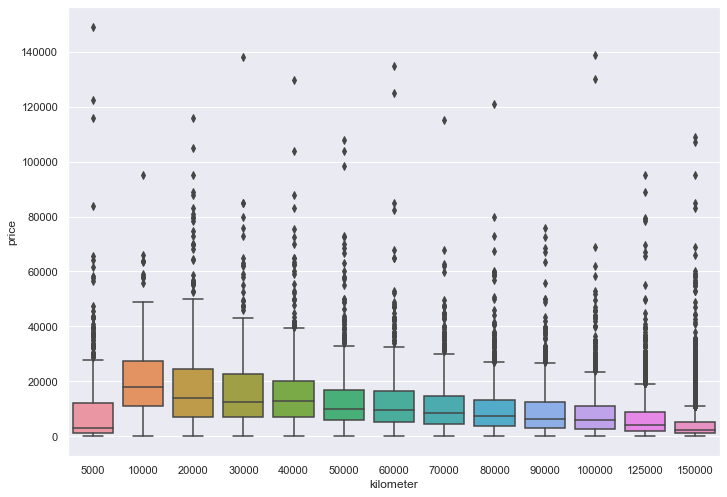

In [751]:
sns.boxplot(x='kilometer',y='price',data=cars)

In [752]:
cars['kilometer'].describe()

count    42772.000
mean    125815.253
std      39078.120
min       5000.000
25%     100000.000
50%     150000.000
75%     150000.000
max     150000.000
Name: kilometer, dtype: float64

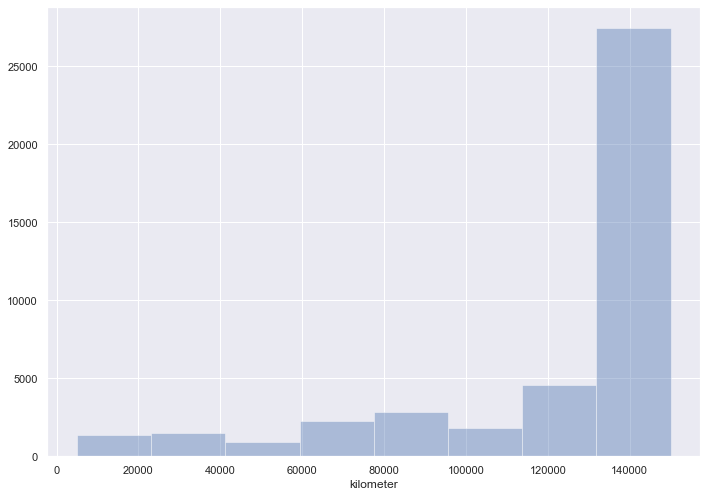

In [753]:
sns.distplot(cars['kilometer'], bins=8, kde=False)

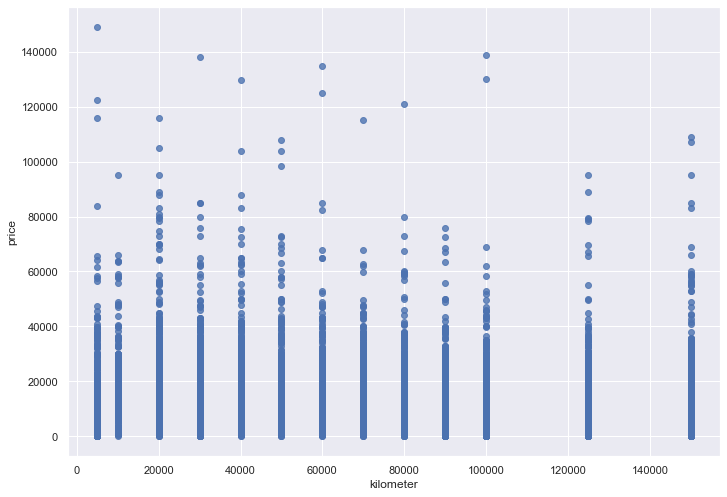

In [754]:
sns.regplot(x='kilometer', y='price', scatter=True, fit_reg=False, data=cars)

Considered in modelling

# Variable fuelType

In [755]:
cars['fuelType'].value_counts()

petrol     26509
diesel     12854
lpg          690
cng           70
hybrid        36
electro       10
other          6
Name: fuelType, dtype: int64

In [756]:
pd.crosstab(cars['fuelType'],columns='count',normalize=True)

col_0,count
fuelType,
cng,0.002
diesel,0.320
electro,0.000
hybrid,0.001
lpg,0.017
other,0.000
petrol,0.660


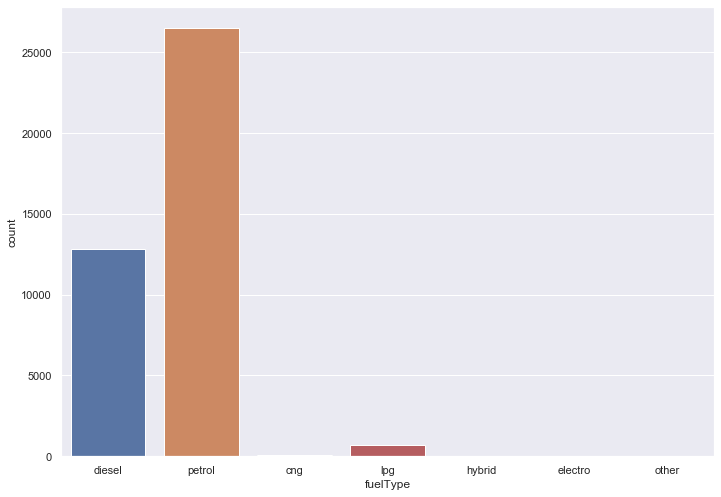

In [757]:
sns.countplot(x='fuelType',data=cars)

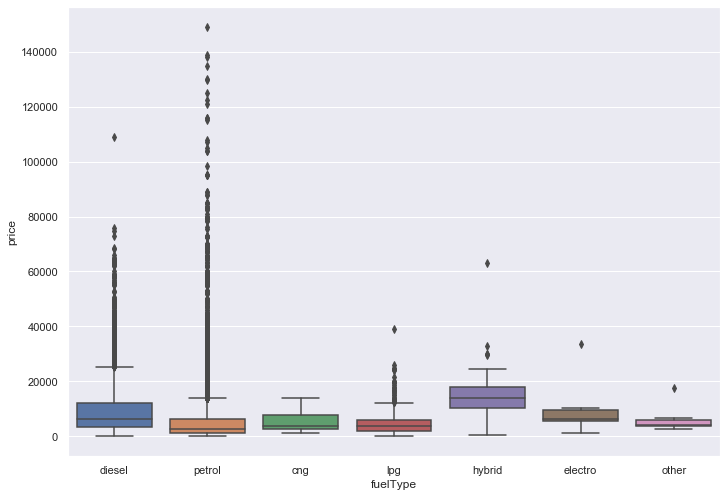

In [758]:
sns.boxplot(x='fuelType',y='price',data=cars)

fuelType affects price

# Variable brand

In [759]:
cars['brand'].value_counts()

volkswagen        9134
bmw               4868
opel              4487
mercedes_benz     4134
audi              3984
ford              2815
renault           1941
peugeot           1323
fiat               996
seat               886
skoda              698
mazda              663
smart              623
nissan             601
citroen            598
toyota             547
volvo              429
mini               428
hyundai            406
mitsubishi         359
honda              300
sonstige_autos     299
kia                276
suzuki             264
porsche            260
alfa_romeo         245
chevrolet          213
chrysler           151
dacia              123
subaru             112
jeep                91
land_rover          81
jaguar              78
daihatsu            67
saab                65
lancia              56
rover               53
daewoo              53
trabant             43
lada                22
Name: brand, dtype: int64

In [760]:
pd.crosstab(cars['brand'],columns='count',normalize=True)

col_0,count
brand,
alfa_romeo,0.006
audi,0.093
bmw,0.114
chevrolet,0.005
chrysler,0.004
citroen,0.014
dacia,0.003
daewoo,0.001
daihatsu,0.002


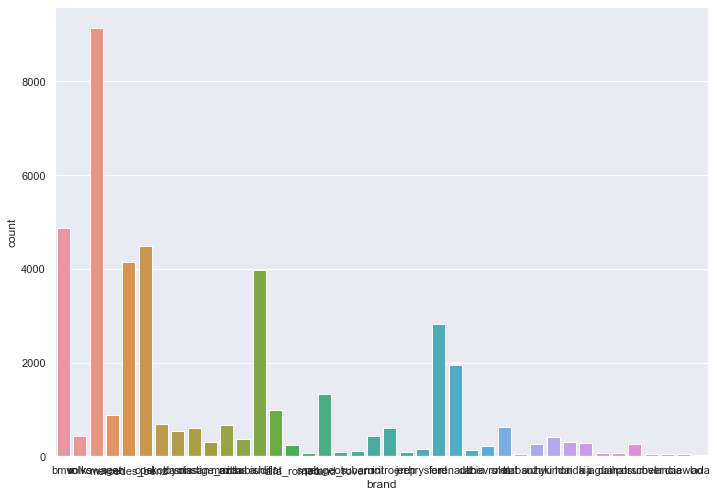

In [761]:
sns.countplot(cars['brand'],data=cars)

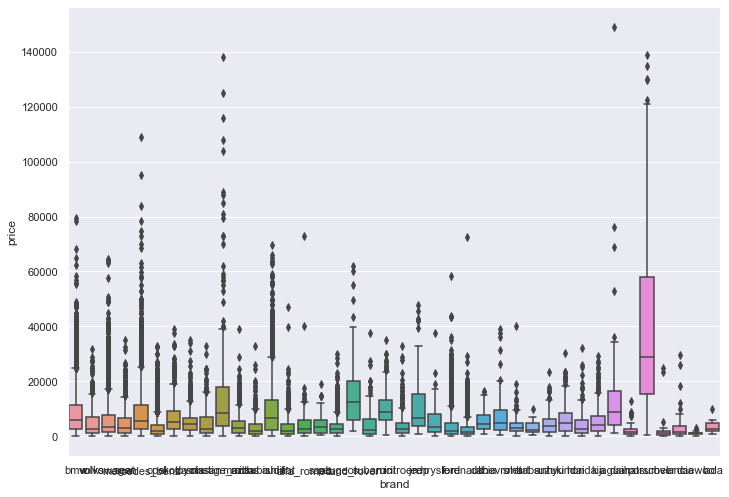

In [762]:
sns.boxplot(x='brand',y='price',data=cars)

Cars are distributed over many brands.

Considered in modelling.

# Variable notRepairedDamage

yes - car is damaged but not rectified

no - car was damaged but has been rectified

In [763]:
cars['notRepairedDamage'].value_counts()

no     32507
yes     3988
Name: notRepairedDamage, dtype: int64

In [764]:
pd.crosstab(cars['notRepairedDamage'],columns='count',normalize=True)

col_0,count
notRepairedDamage,
no,0.891
yes,0.109


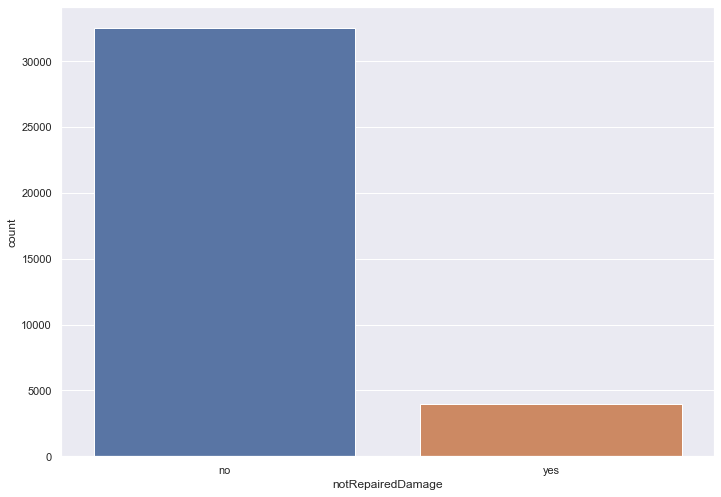

In [765]:
sns.countplot(cars['notRepairedDamage'], data=cars)

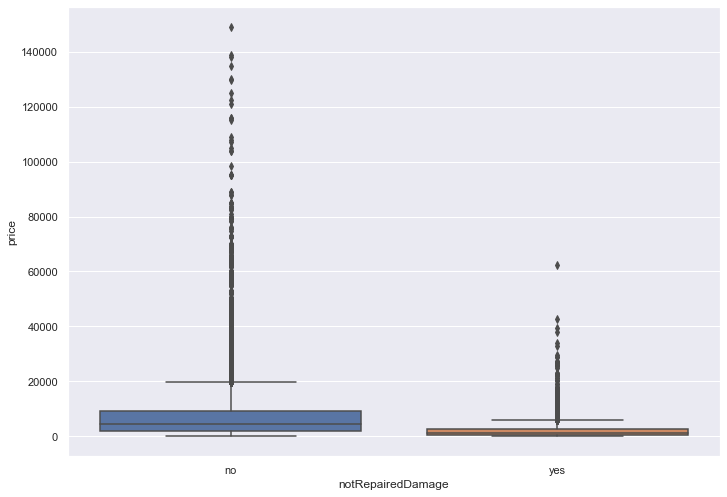

In [766]:
sns.boxplot(x='notRepairedDamage',y='price',data=cars)

As expected, the cars that require the damages to be repaired

fall under lower price ranges

# Removing insignificant variables

In [767]:
col=['seller','offerType','abtest']

In [768]:
cars = cars.drop(columns=col,axis=1)

In [769]:
cars_copy = cars.copy()

# Correlation

In [770]:
cars_select1 = cars.select_dtypes(exclude=[object])

In [771]:
correlation = cars_select1.corr()

In [772]:
round(correlation,3)

,price,powerPS,kilometer,Age
price,1.000,0.575,-0.440,-0.336
powerPS,0.575,1.000,-0.016,-0.151
kilometer,-0.440,-0.016,1.000,0.292
Age,-0.336,-0.151,0.292,1.000


In [773]:
cars_select1.corr().loc[:,'price'].abs().sort_values(ascending=False)[1:]

powerPS     0.575
kilometer   0.440
Age         0.336
Name: price, dtype: float64

# We are going to build a Linear Regression and Random Forest model on two sets of data.

# =>Data obtained by omitting rows with any missing values.

# =>Data obtained by inputing the missing values.

# Omitting missing values

In [774]:
cars_omit = cars.dropna(axis=0)

# Converting categorical variables into dummy variables

In [775]:
cars_omit = pd.get_dummies(cars_omit,drop_first=True)

# Importing necessary libraries

In [776]:
from sklearn.model_selection import train_test_split

In [777]:
from sklearn.linear_model import LinearRegression

In [778]:
from sklearn.ensemble import RandomForestRegressor

In [779]:
from sklearn.metrics import mean_squared_error

# Model building with omitted data

# separating input and output features

In [780]:
x1 = cars_omit.drop(['price'],axis='columns',inplace=False)

In [781]:
y1 = cars_omit['price']

# plotting the variable price

In [782]:
prices = pd.DataFrame({"1. Before":y1, "2. After":np.log(y1)})

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022F7DFF0E88>,
      dtype=object)

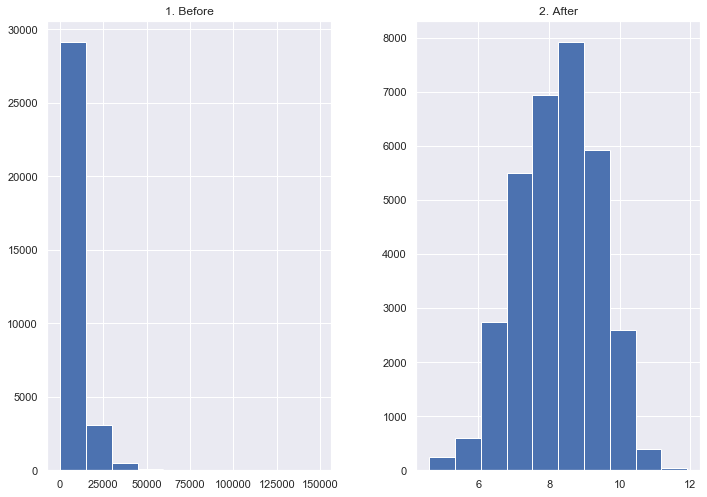

In [783]:
prices.hist()

# transforming price as logarthmic value

In [784]:
y1 = np.log(y1)

# splitting data into test and train

In [785]:
X_train,X_test,y_train,y_test = train_test_split(x1, y1, test_size=0.3, random_state=3)

In [786]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(23018, 300) (9866, 300) (23018,) (9866,)


# Baseline model for omitted data

We are making a base model by using test data mean value

This is to set a benchmark and to compare with our regression model

# finding the mean for test data value

In [787]:
base_pred = np.mean(y_test)
print(base_pred)

8.249615787653337


# repeating same value till length of test data

In [788]:
base_pred = np.repeat(base_pred, len(y_test))

# finding the RMSE

In [789]:
base_root_mean_square_error_omitted = np.sqrt(mean_squared_error(y_test, base_pred))
print(base_root_mean_square_error_omitted)

1.1274483657478247


# Linear Regression with omitted data

# setting intercept as true

In [790]:
lgr = LinearRegression(fit_intercept=True)

# model

In [791]:
model_lin1 = lgr.fit(X_train,y_train)

# predicting model on test set

In [792]:
cars_predictions_lin1 = lgr.predict(X_test)

# computing MSE and RMSE

In [793]:
lin_mse1 = mean_squared_error(y_test, cars_predictions_lin1)
lin_rmse1 = np.sqrt(lin_mse1)
print(lin_rmse1)

0.5455481266513849


# R squared value

In [794]:
r2_lin_test1 = model_lin1.score(X_test,y_test)
r2_lin_train1 = model_lin1.score(X_train,y_train)
print(r2_lin_test1, r2_lin_train1)

0.7658615091649237 0.7800936978183916


# Regression diagnostics - Residual plot analysis

count   9866.000
mean       0.003
std        0.546
min       -5.796
25%       -0.261
50%        0.041
75%        0.302
max        4.547
Name: price, dtype: float64

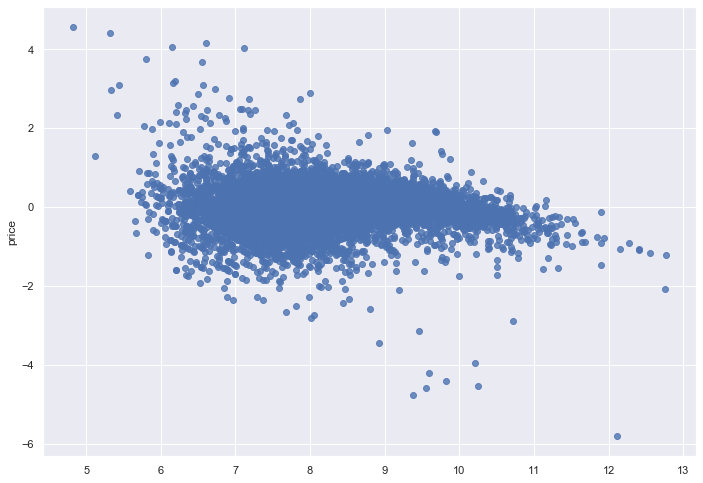

In [795]:
residuals1 = y_test - cars_predictions_lin1
sns.regplot(x=cars_predictions_lin1, y=residuals1, scatter=True, fit_reg=False)
residuals1.describe()

# Random forest with omitted data

# model parameters

In [796]:
rf = RandomForestRegressor(n_estimators=100, max_features='auto', max_depth=100, min_samples_split=10, min_samples_leaf=4, random_state=1)

# model

In [797]:
model_rf1 = rf.fit(X_train,y_train)

# predicting model on test set

In [798]:
cars_predictions_rf1 = rf.predict(X_test)


# computing MSE and RMSE

In [799]:
rf_mse1 = mean_squared_error(y_test, cars_predictions_rf1)
rf_rmse1 = np.sqrt(rf_mse1)
print(rf_rmse1)

0.436073731962631


# R squared value

In [800]:
r2_rf_test1 = model_rf1.score(X_test,y_test)
r2_rf_train1 = model_rf1.score(X_train,y_train)
print(r2_rf_test1, r2_rf_train1)

0.8504017440877062 0.9202494705146291


# Model building with imputed data

In [801]:
cars_imputed = cars.apply(lambda x:x.fillna(x.median())
                 if x.dtype=='float' else
                 x.fillna(x.value_counts().index[0]))

In [802]:
cars_imputed.isnull().sum()

price                0
vehicleType          0
gearbox              0
powerPS              0
model                0
kilometer            0
fuelType             0
brand                0
notRepairedDamage    0
Age                  0
dtype: int64

# converting categorical variables to dummy variables

In [803]:
cars_imputed = pd.get_dummies(cars_imputed, drop_first=True)

# separating input and output features

In [804]:
x2 = cars_imputed.drop(['price'],axis='columns',inplace=False)

In [805]:
y2 = cars_imputed['price']

# plotting the variable price

In [806]:
prices = pd.DataFrame({"1. Before":y2, "2. After":np.log(y2)})

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022F6ABE4308>,
      dtype=object)

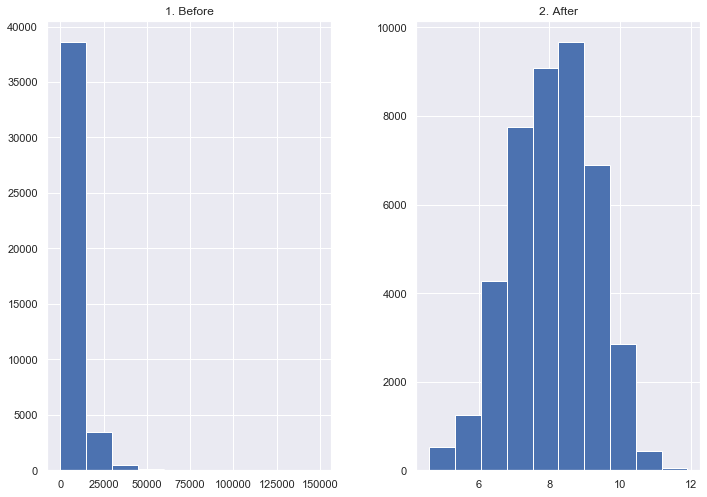

In [807]:
prices.hist()

# transforming price as logarthmic value

In [808]:
y2 = np.log(y2)

# splitting data into test and train

In [809]:
X_train1,X_test1,y_train1,y_test1 = train_test_split(x2, y2, test_size=0.3, random_state=3)
print(X_train1.shape, X_test1.shape, y_train1.shape, y_test1.shape)

(29940, 303) (12832, 303) (29940,) (12832,)


# Baseline model for imputed data

We are making a base model by using test data mean value

This is to set a benchmark and to compare with our regression model

# finding the mean for test data value

In [810]:
base_pred = np.mean(y_test1)
print(base_pred)

8.068391740519193


# repeating same value till length of test data

In [811]:
base_pred = np.repeat(base_pred, len(y_test1))

# finding the RMSE

In [812]:
base_root_mean_square_error_imputed = np.sqrt(mean_squared_error(y_test1, base_pred))
print(base_root_mean_square_error_imputed)

1.1884349112889792


# Linear Regression with imputed data

# setting intercept as true

In [813]:
lgr2 = LinearRegression(fit_intercept=True)

# model

In [814]:
model_lin2 = lgr2.fit(X_train1,y_train1)

# predicting model on test set

In [815]:
cars_predictions_lin2 = lgr2.predict(X_test1)

# computing MSE and RMSE

In [816]:
lin_mse2 = mean_squared_error(y_test1, cars_predictions_lin2)
lin_rmse2 = np.sqrt(lin_mse2)
print(lin_rmse2)

0.64839564492313


# R squared value

In [817]:
r2_lin_test2 = model_lin2.score(X_test1,y_test1)
r2_lin_train2 = model_lin2.score(X_train1,y_train1)
print(r2_lin_test2, r2_lin_train2)

0.7023339008631182 0.7071658736894363


# Regression diagnostics - Residual plot analysis

count   12832.000
mean       -0.024
std         0.648
min        -6.591
25%        -0.348
50%         0.043
75%         0.374
max         4.607
Name: price, dtype: float64

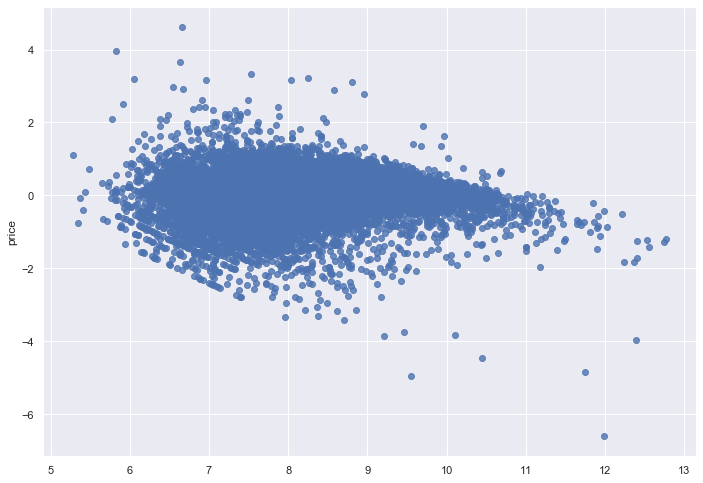

In [818]:
residuals2 = y_test1 - cars_predictions_lin2
sns.regplot(x=cars_predictions_lin2, y=residuals2, scatter=True, fit_reg=False)
residuals2.describe()

# Random forest with imputed data


# model parameters

In [819]:
rf2 = RandomForestRegressor(n_estimators=100, max_features='auto', max_depth=100, min_samples_split=10, min_samples_leaf=4, random_state=1)

# model

In [820]:
model_rf2 = rf2.fit(X_train1,y_train1)

# predicting model on test set

In [821]:
cars_predictions_rf2 = rf2.predict(X_test1)

# computing MSE and RMSE

In [822]:
rf_mse2 = mean_squared_error(y_test1, cars_predictions_rf2)
rf_rmse2 = np.sqrt(rf_mse2)
print(rf_rmse2)

0.494316830858078


# R squared value

In [823]:
r2_rf_test2 = model_rf2.score(X_test1,y_test1)
r2_rf_train2 = model_rf2.score(X_train1,y_train1)
print(r2_rf_test2, r2_rf_train2)

0.8269944666838189 0.9024289705830797


# Final output

In [824]:
print("Metrics for model built from data where missing values are omitted")
print("R squared value for train from Linear Regression= %s"% r2_lin_train1)
print("R squared value for test from Linear Regression= %s"% r2_lin_test1)
print("R squared value for train from Random Forest= %s"% r2_rf_train1)
print("R squared value for test from Random Forest= %s"% r2_rf_test1)
print("Base RSME of model built from data where missing values were omitted= %s"%base_root_mean_square_error_omitted)
print("RSME value for test from Linear Regression= %s"% lin_rmse1)
print("RSME value for test from Random Forest= %s"% rf_rmse1)
print("\n\n")
print("Metrics for model built from data where missing values are imputed")
print("R squared value for train from Linear Regression= %s"% r2_lin_train2)
print("R squared value for test from Linear Regression= %s"% r2_lin_test2)
print("R squared value for train from Random Forest= %s"% r2_rf_train2)
print("R squared value for test from Random Forest= %s"% r2_rf_test2)
print("Base RSME of model built from data where missing values were imputed= %s"%base_root_mean_square_error_imputed)
print("RSME value for test from Linear Regression= %s"% lin_rmse2)
print("RSME value for test from Random Forest= %s"% rf_rmse2)

Metrics for model built from data where missing values are omitted
R squared value for train from Linear Regression= 0.7800936978183916
R squared value for test from Linear Regression= 0.7658615091649237
R squared value for train from Random Forest= 0.9202494705146291
R squared value for test from Random Forest= 0.8504017440877062
Base RSME of model built from data where missing values were omitted= 1.1274483657478247
RSME value for test from Linear Regression= 0.5455481266513849
RSME value for test from Random Forest= 0.436073731962631



Metrics for model built from data where missing values are imputed
R squared value for train from Linear Regression= 0.7071658736894363
R squared value for test from Linear Regression= 0.7023339008631182
R squared value for train from Random Forest= 0.9024289705830797
R squared value for test from Random Forest= 0.8269944666838189
Base RSME of model built from data where missing values were imputed= 1.1884349112889792
RSME value for test from Linear 

# Conclusion:-

It has been observed that there is a remarkable change in the RMSE value between our linear regression and random forest model. So, our random forest model is definitely a lot better than our linear regression model.
Also the model is performing slightly good for data where missing values are omitted because in that case we have a clean data.